In [1]:
import argparse
import numpy as np
from numpy.linalg import inv, norm
from scipy.spatial.transform import Rotation as Rot
import pickle
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from typing import List
import open3d as o3d
import clipperpy
import time
import json
from copy import deepcopy
import yaml

from robotdatapy.data.pose_data import PoseData
from robotdatapy.transform import transform_to_xytheta, transform_to_xyz_quat
from robotdatapy.geometry import circle_intersection
from robotdatapy.transform import T_FLURDF, T_RDFFLU
from robotdatapy import transform

from segment_track.segment import Segment
from segment_track.tracker import Tracker

from object_map_registration.object.ellipsoid import Ellipsoid
from object_map_registration.object.object import Object
from object_map_registration.object.pointcloud_object import PointCloudObject
from object_map_registration.register.dist_min_max_sim_reg import DistOnlyReg, DistVolReg, DistMinMaxPCAReg, DistCustomFeatureComboReg
from object_map_registration.register.dist_semantic_sim_reg import DistSemanticSimReg

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
from submap_align import create_submaps

In [3]:
submap1_path = "../demo/output/kmd/sparkal1.pkl"
submap2_path = "../demo/output/kmd/sparkal2.pkl"
submap_radius = 20.0
submap_center_dist = 10.0
show_maps = True
gt_pose_data = [None, None]
rotate_maps_to_gt = False

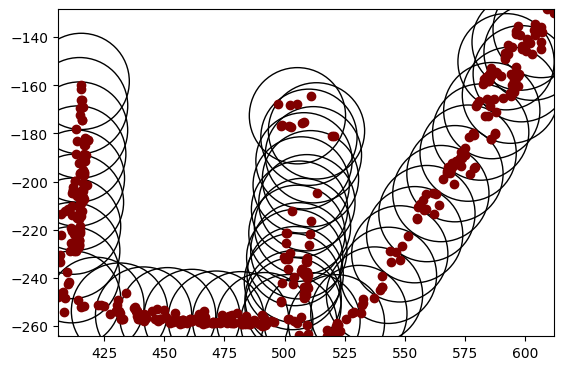

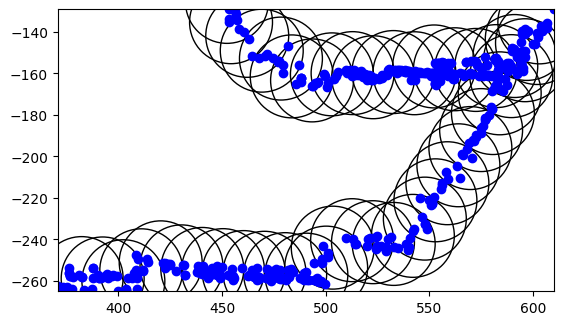

In [4]:
submap_centers, submaps, poses, times, submap_idxs = create_submaps([submap1_path, submap2_path], 
                                                                    submap_radius, 
                                                                    submap_center_dist, 
                                                                    show_maps=show_maps, 
                                                                    gt_pose_data=gt_pose_data, 
                                                                    rot_maps_to_gt=rotate_maps_to_gt)

In [8]:
sigma = 0.5
epsilon = 1.0
registration = DistSemanticSimReg(sigma=sigma, epsilon=epsilon, cos_feature_dim=512, cosine_min=0.5, cosine_max=0.9)

In [6]:
submap0 = submaps[0]
submap1 = submaps[1]
print(len(submap0), len(submap1))

In [78]:
submap0_part = submap0[-14]
submap1_part = submap1[29]
print(len(submap0_part), len(submap1_part))

12 22


In [71]:
for idx, obj in enumerate(submap0_part):
    print(idx, obj._id)

0 1731
1 1747
2 1721
3 1752
4 1800
5 1802
6 1797
7 1803
8 1834
9 1857
10 1896
11 1881


In [79]:
for idx, obj in enumerate(submap1_part):
    print(idx, obj._id)

0 1494
1 1499
2 1497
3 1515
4 1516
5 1517
6 1513
7 1523
8 1526
9 1529
10 1543
11 1548
12 1559
13 1555
14 1563
15 1572
16 1585
17 1597
18 1591
19 1603
20 1573
21 1618


In [80]:
associations = registration.register(submap0_part, submap1_part)

In [81]:
for assoc in associations:
    print(assoc)
    print(submap0_part[assoc[0]]._id, submap1_part[assoc[1]]._id)

[ 2 18]
1721 1591
[ 1 17]
1747 1597
[10  2]
1896 1497
[ 6 13]
1797 1555
[ 3 16]
1752 1585
[9 9]
1857 1529


In [83]:
obj0 = submap0_part[2]
obj1 = submap1_part[18]
print(obj0._id, obj1._id)
print(np.dot(obj0.semantic_descriptor, obj1.semantic_descriptor))

1721 1591
0.971


In [85]:
obj0 = submap0_part[1]
obj1 = submap1_part[17]
print(obj0._id, obj1._id)
print(np.dot(obj0.semantic_descriptor, obj1.semantic_descriptor))

1747 1597
0.8545
